   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

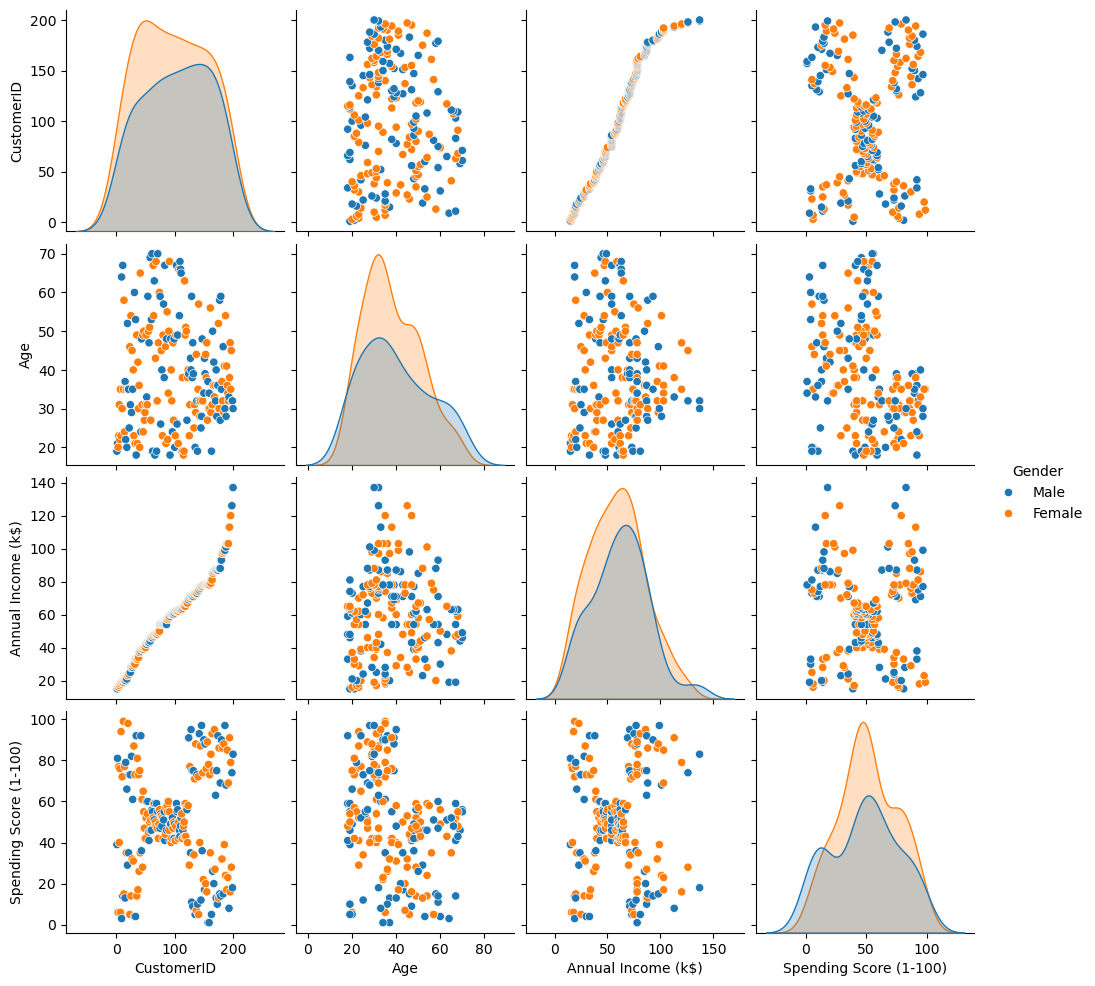

In [43]:
# Paso 1: Análisis Exploratorio de Datos (EDA)
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
dataset_path = r"C:\Users\Javier Alexander Gar\Downloads\Mosquera tareas\ANÁLISIS DE DATOS\Tarea 4\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv"
data = pd.read_csv(dataset_path)

# Ver las primeras filas del dataset
print(data.head())

# Ver información general del dataset
print(data.info())

# Ver estadísticas descriptivas del dataset
print(data.describe())

# Verificar valores faltantes
print(data.isnull().sum())

# Relación entre variables: Utilizar pairplot para ver cómo se relacionan las variables
sns.pairplot(data, hue='Gender')  
plt.show()


In [44]:
# Paso 2: Preprocesamiento de Datos
from sklearn.preprocessing import StandardScaler

# Limpiar el dataset eliminando filas con valores faltantes
data_clean = data.dropna()

# Transformar las variables: Escalado de las características numéricas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Verificación del escalado
print(data_scaled[:5])  # Muestra las primeras 5 filas del dataset escalado

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [46]:
# Paso 3: Selección de características
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de las mejores 2 características usando ANOVA F-test
selector = SelectKBest(f_classif, k=2)  # Seleccionar las 2 características más relevantes
data_selected = selector.fit_transform(data_scaled, data_clean['Gender'])

# Ver las características seleccionadas
print(data_selected[:5])  

[[-1.42456879 -0.43480148]
 [-1.28103541  1.19570407]
 [-1.3528021  -1.71591298]
 [-1.13750203  1.04041783]
 [-0.56336851 -0.39597992]]


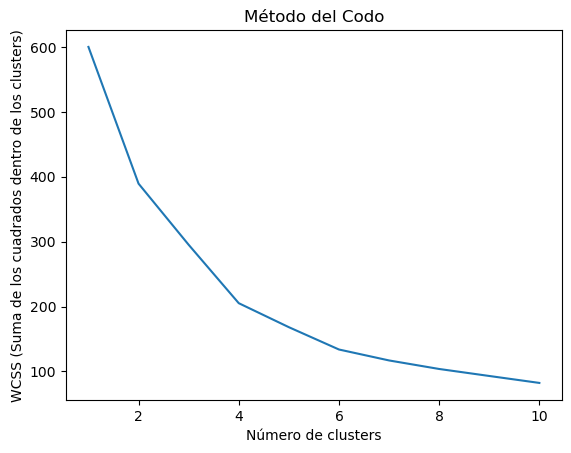

In [47]:
# Paso 4: Entrenamiento del modelo
# Elegimos el número de clusters (k) con el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Graficamos el método del codo para encontrar el k óptimo
plt.plot(range(1, 11), wcss)
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS (Suma de los cuadrados dentro de los clusters)")
plt.show()

# Elegimos el número de clusters basado en el gráfico (por ejemplo, k=5)
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(features_scaled)


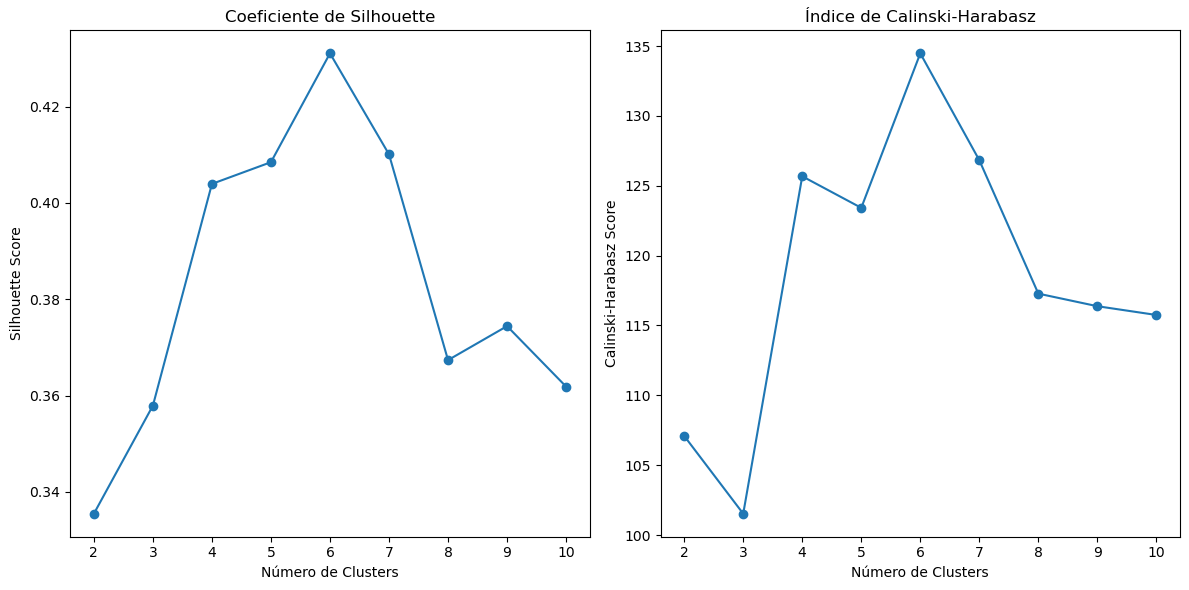

In [48]:
# Paso 5: Evaluar el desempeño del modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_scores = []
calinski_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(data_scaled, kmeans.labels_))

# Visualización de las métricas de desempeño
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Coeficiente de Silhouette")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), calinski_scores, marker='o')
plt.title("Índice de Calinski-Harabasz")
plt.xlabel("Número de Clusters")
plt.ylabel("Calinski-Harabasz Score")

plt.tight_layout()
plt.show()

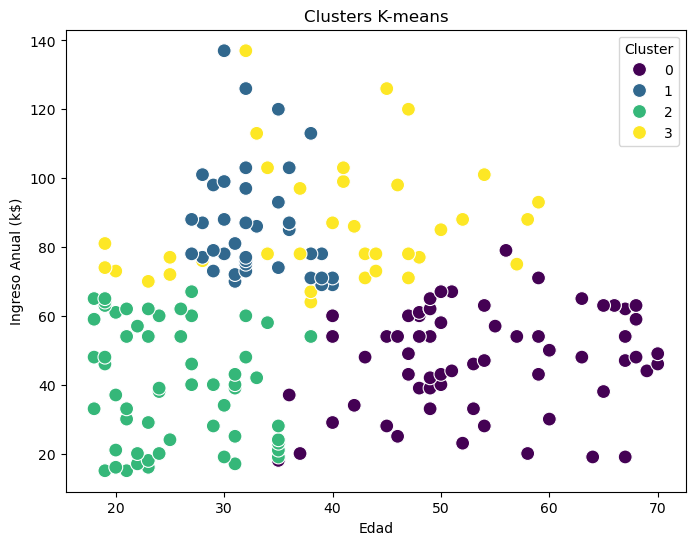

In [49]:
# Paso 6: Visualización de los resultados
# Seleccionar el mejor valor de K, por ejemplo K=4
kmeans_final = KMeans(n_clusters=4, random_state=42)
data_clean['Cluster'] = kmeans_final.fit_predict(data_scaled)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_clean['Age'], y=data_clean['Annual Income (k$)'], hue=data_clean['Cluster'], palette='viridis', s=100)
plt.title("Clusters K-means")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.legend(title='Cluster')
plt.show()

In [54]:
# Paso 7: Interpretación y análisis de los resultados
# Mostrar los centroides de los clusters
centroides = pd.DataFrame(kmeans_final.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("Centroides de cada Cluster:")
print(centroides)

# Análisis de la distribución de los clusters
cluster_counts = data_clean['Cluster'].value_counts()
print("\nDistribución de los clusters:")
print(cluster_counts)

# Paso 8: Medidas de calidad para K-Means
from sklearn import metrics

# Calcular medidas de calidad para K-Means
print("\nMedidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(data_scaled, data_clean['Cluster']))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(data_scaled, data_clean['Cluster']))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans_final.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(data_scaled, data_clean['Cluster']))

Centroides de cada Cluster:
        Age  Annual Income (k$)  Spending Score (1-100)
0  1.086161           -0.490565               -0.397174
1 -0.428806            0.974847                1.216085
2 -0.962492           -0.784763                0.392030
3  0.037205            0.990115               -1.188757

Distribución de los clusters:
Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64

Medidas de calidad para K-Means:
Puntaje de silueta: 0.4039582785148566
Índice de Calinski-Harabasz: 125.67639662405028
Inertia (suma de cuadrados dentro de los clusters): 205.22514747675916
Davies-Bouldin Index: 0.9307956868103671
